In [1]:
dotnet build ..

Microsoft (R) Build Engine version 16.9.0-preview-21103-02+198f3f262 for .NET


Copyright (C) Microsoft Corporation. All rights reserved.


  Determining projects to restore...


  All projects are up-to-date for restore.


  You are using a preview version of .NET. See: https://aka.ms/dotnet-core-preview


  You are using a preview version of .NET. See: https://aka.ms/dotnet-core-preview


  You are using a preview version of .NET. See: https://aka.ms/dotnet-core-preview


  Shirhatti.Graphviz -> C:\Users\shirh\source\repos\Shirhatti.Graphviz\src\Shirhatti.Graphviz\bin\Debug\netstandard2.1\Shirhatti.Graphviz.dll


  You are using a preview version of .NET. See: https://aka.ms/dotnet-core-preview


  Shirhatti.Graphviz -> C:\Users\shirh\source\repos\Shirhatti.Graphviz\src\Shirhatti.Graphviz\bin\Debug\net6.0\Shirhatti.Graphviz.dll


  WebApp -> C:\Users\shirh\source\repos\Shirhatti.Graphviz\samples\WebApp\bin\Debug\net6.0\WebApp.dll


  ConsoleApp -> C:\Users\shirh\source\repos\Shirhatti.Graphviz\samples\ConsoleApp\bin\Debug\net6.0\ConsoleApp.dll


Build succeeded.


    0 Warning(s)


    0 Error(s)


Time Elapsed 00:00:03.01


In [1]:
using System;
using System.IO;
using System.Reflection;
using System.Runtime.CompilerServices;
using System.Runtime.InteropServices;

if (RuntimeInformation.IsOSPlatform(OSPlatform.Windows))
{
  var graphVizBinPath = Path.Combine(
    Environment.GetFolderPath(Environment.SpecialFolder.ProgramFiles),
    "Graphviz", "bin");
  NativeLibrary.SetDllImportResolver(Assembly.GetExecutingAssembly(), (libraryName, assembly, searchPath) =>
  {
      if (RuntimeInformation.IsOSPlatform(OSPlatform.Windows))
      {

          if (NativeLibrary.TryLoad(Path.Join(graphVizBinPath, libraryName), out IntPtr handle)) return handle;
      }
      return default;
  });
}

In [1]:
#r "..\src\Shirhatti.Graphviz\bin\Debug\netstandard2.1\Shirhatti.Graphviz.dll"
#r "nuget: DotNetGraph, 2.6.0"

In [1]:
using Shirhatti.Graphviz;

var graphviz = new Graphviz();
Console.WriteLine(graphviz.BuildDate);
Console.WriteLine(graphviz.Version);

20210213.1702


2.46.1


In [1]:
using System.Text;
using DotNetGraph;
using DotNetGraph.Edge;
using DotNetGraph.Extensions;
using Shirhatti.Graphviz;

var graph = new DotGraph("graph");
var myEdge = new DotEdge("myNode1", "myNode2");
graph.Elements.Add(myEdge);
var dot = graph.Compile();

var cgraph = new Cgraph(dot);
var image = graphviz.RenderDot(cgraph, OutputFormat.Svg);
var svgString = Encoding.ASCII.GetString(image);

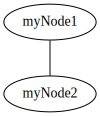

In [1]:
display(svgString, "image/svg+xml")